In [24]:
import pandas as pd
import numpy as np
import networkx as nx
import sys
import matplotlib.pyplot as plt
import random
import time
#from nxsim import BaseNetworkAgent
from datetime import datetime
import collections
from collections import defaultdict
import copy
import math
nx.__version__

'2.2'

In [4]:
# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (24, 12))
# Font size to 14
matplotlib.rc('font', size = 20)
# Add grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

In [5]:
read_data = pd.read_csv("pnas.1713568115.sd01.txt") #read the data file, no cleaning required
read_data = read_data[read_data['trial'] == 1]  #take the data for the 1st trial only
data = read_data
data.head(10)
#print(len(data))
#type(data)



data['time'] = data['end'] - data['begin']#store the diff btw begin and end to get total time for each trans. in ms
data['time'] = data['time']/1000.0 #change 'ms' to 's'
#data['time'] = data['time'].map(lambda x: [x]) #convert the time attr to list as as there are multiple iteractions between two bees


In [6]:
data.head(10)

,trial,id1,id2,begin,end,time
0,1,201,219,1.373105e+12,1.373105e+12,2.000
1,1,201,219,1.373109e+12,1.373109e+12,42.000
2,1,201,242,1.373119e+12,1.373119e+12,2.000
3,1,201,242,1.373119e+12,1.373119e+12,2.999
4,1,201,255,1.372958e+12,1.372958e+12,41.999
5,1,201,259,1.372937e+12,1.372937e+12,15.000
6,1,201,259,1.373041e+12,1.373041e+12,3.000
7,1,201,259,1.373240e+12,1.373240e+12,8.000
8,1,201,262,1.373360e+12,1.373360e+12,27.999
9,1,201,263,1.373178e+12,1.373178e+12,2.000


In [7]:
data['begin'] = data['begin']/1000.0 #change 'ms' to 's'


data.head(10)

,trial,id1,id2,begin,end,time
0,1,201,219,1.373105e+09,1.373105e+12,2.000
1,1,201,219,1.373109e+09,1.373109e+12,42.000
2,1,201,242,1.373119e+09,1.373119e+12,2.000
3,1,201,242,1.373119e+09,1.373119e+12,2.999
4,1,201,255,1.372958e+09,1.372958e+12,41.999
5,1,201,259,1.372937e+09,1.372937e+12,15.000
6,1,201,259,1.373041e+09,1.373041e+12,3.000
7,1,201,259,1.373240e+09,1.373240e+12,8.000
8,1,201,262,1.373360e+09,1.373360e+12,27.999
9,1,201,263,1.373178e+09,1.373178e+12,2.000


In [8]:
data['day'] = data['begin'].map(lambda x: int(datetime.utcfromtimestamp(x).strftime('%d')))
data.head(10)

,trial,id1,id2,begin,end,time,day
0,1,201,219,1.373105e+09,1.373105e+12,2.000,6
1,1,201,219,1.373109e+09,1.373109e+12,42.000,6
2,1,201,242,1.373119e+09,1.373119e+12,2.000,6
3,1,201,242,1.373119e+09,1.373119e+12,2.999,6
4,1,201,255,1.372958e+09,1.372958e+12,41.999,4
5,1,201,259,1.372937e+09,1.372937e+12,15.000,4
6,1,201,259,1.373041e+09,1.373041e+12,3.000,5
7,1,201,259,1.373240e+09,1.373240e+12,8.000,7
8,1,201,262,1.373360e+09,1.373360e+12,27.999,9
9,1,201,263,1.373178e+09,1.373178e+12,2.000,7


In [9]:
data['UTC'] = data['begin'].map(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
data.head(10)

,trial,id1,id2,begin,end,time,day,UTC
0,1,201,219,1.373105e+09,1.373105e+12,2.000,6,2013-07-06 10:05:05
1,1,201,219,1.373109e+09,1.373109e+12,42.000,6,2013-07-06 11:14:59
2,1,201,242,1.373119e+09,1.373119e+12,2.000,6,2013-07-06 13:56:42
3,1,201,242,1.373119e+09,1.373119e+12,2.999,6,2013-07-06 13:57:10
4,1,201,255,1.372958e+09,1.372958e+12,41.999,4,2013-07-04 17:14:29
5,1,201,259,1.372937e+09,1.372937e+12,15.000,4,2013-07-04 11:28:14
6,1,201,259,1.373041e+09,1.373041e+12,3.000,5,2013-07-05 16:11:35
7,1,201,259,1.373240e+09,1.373240e+12,8.000,7,2013-07-07 23:33:29
8,1,201,262,1.373360e+09,1.373360e+12,27.999,9,2013-07-09 08:54:53
9,1,201,263,1.373178e+09,1.373178e+12,2.000,7,2013-07-07 06:25:01


In [10]:
data['hours'] = data['begin'].map(lambda x: int(datetime.utcfromtimestamp(x).strftime('%H')))
data.head(10)

,trial,id1,id2,begin,end,time,day,UTC,hours
0,1,201,219,1.373105e+09,1.373105e+12,2.000,6,2013-07-06 10:05:05,10
1,1,201,219,1.373109e+09,1.373109e+12,42.000,6,2013-07-06 11:14:59,11
2,1,201,242,1.373119e+09,1.373119e+12,2.000,6,2013-07-06 13:56:42,13
3,1,201,242,1.373119e+09,1.373119e+12,2.999,6,2013-07-06 13:57:10,13
4,1,201,255,1.372958e+09,1.372958e+12,41.999,4,2013-07-04 17:14:29,17
5,1,201,259,1.372937e+09,1.372937e+12,15.000,4,2013-07-04 11:28:14,11
6,1,201,259,1.373041e+09,1.373041e+12,3.000,5,2013-07-05 16:11:35,16
7,1,201,259,1.373240e+09,1.373240e+12,8.000,7,2013-07-07 23:33:29,23
8,1,201,262,1.373360e+09,1.373360e+12,27.999,9,2013-07-09 08:54:53,8
9,1,201,263,1.373178e+09,1.373178e+12,2.000,7,2013-07-07 06:25:01,6


In [11]:
data = data.sort_values('begin')
data.head(20)

,trial,id1,id2,begin,end,time,day,UTC,hours
102932,1,612,1697,1.372829e+09,1.372829e+12,3.000,3,2013-07-03 05:29:18,5
138807,1,740,829,1.372829e+09,1.372829e+12,2.000,3,2013-07-03 05:29:23,5
225447,1,1138,1305,1.372829e+09,1.372829e+12,5.999,3,2013-07-03 05:29:32,5
11636,1,267,876,1.372829e+09,1.372829e+12,11.000,3,2013-07-03 05:29:41,5
126121,1,701,912,1.372829e+09,1.372829e+12,10.000,3,2013-07-03 05:29:41,5
119604,1,667,1460,1.372829e+09,1.372829e+12,17.000,3,2013-07-03 05:29:49,5
189002,1,938,1322,1.372829e+09,1.372829e+12,2.000,3,2013-07-03 05:29:52,5
243670,1,1248,1657,1.372829e+09,1.372829e+12,4.000,3,2013-07-03 05:30:18,5
234946,1,1205,1593,1.372829e+09,1.372829e+12,16.999,3,2013-07-03 05:30:25,5
21359,1,288,643,1.372829e+09,1.372829e+12,2.000,3,2013-07-03 05:30:25,5


In [12]:
data.tail(10)

,trial,id1,id2,begin,end,time,day,UTC,hours
163052,1,841,1500,1.373780e+09,1.373780e+12,2.000,14,2013-07-14 05:34:34,5
222837,1,1114,1177,1.373780e+09,1.373780e+12,13.000,14,2013-07-14 05:34:34,5
195908,1,959,1855,1.373780e+09,1.373780e+12,2.000,14,2013-07-14 05:34:38,5
297200,1,1796,1903,1.373780e+09,1.373780e+12,11.000,14,2013-07-14 05:34:40,5
302062,1,2007,2010,1.373780e+09,1.373780e+12,4.000,14,2013-07-14 05:34:44,5
7701,1,258,1218,1.373780e+09,1.373780e+12,2.999,14,2013-07-14 05:35:05,5
133194,1,724,1632,1.373780e+09,1.373780e+12,6.000,14,2013-07-14 05:35:36,5
93952,1,567,1444,1.373780e+09,1.373780e+12,2.000,14,2013-07-14 05:35:45,5
102184,1,611,903,1.373780e+09,1.373780e+12,7.000,14,2013-07-14 05:35:50,5
194268,1,953,1738,1.373780e+09,1.373780e+12,2.000,14,2013-07-14 05:35:56,5


In [13]:
unique_days = data.day.unique()
unique_days

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [14]:
data_day_3 = data[data['day'] ==3]
len(data_day_3)

30889

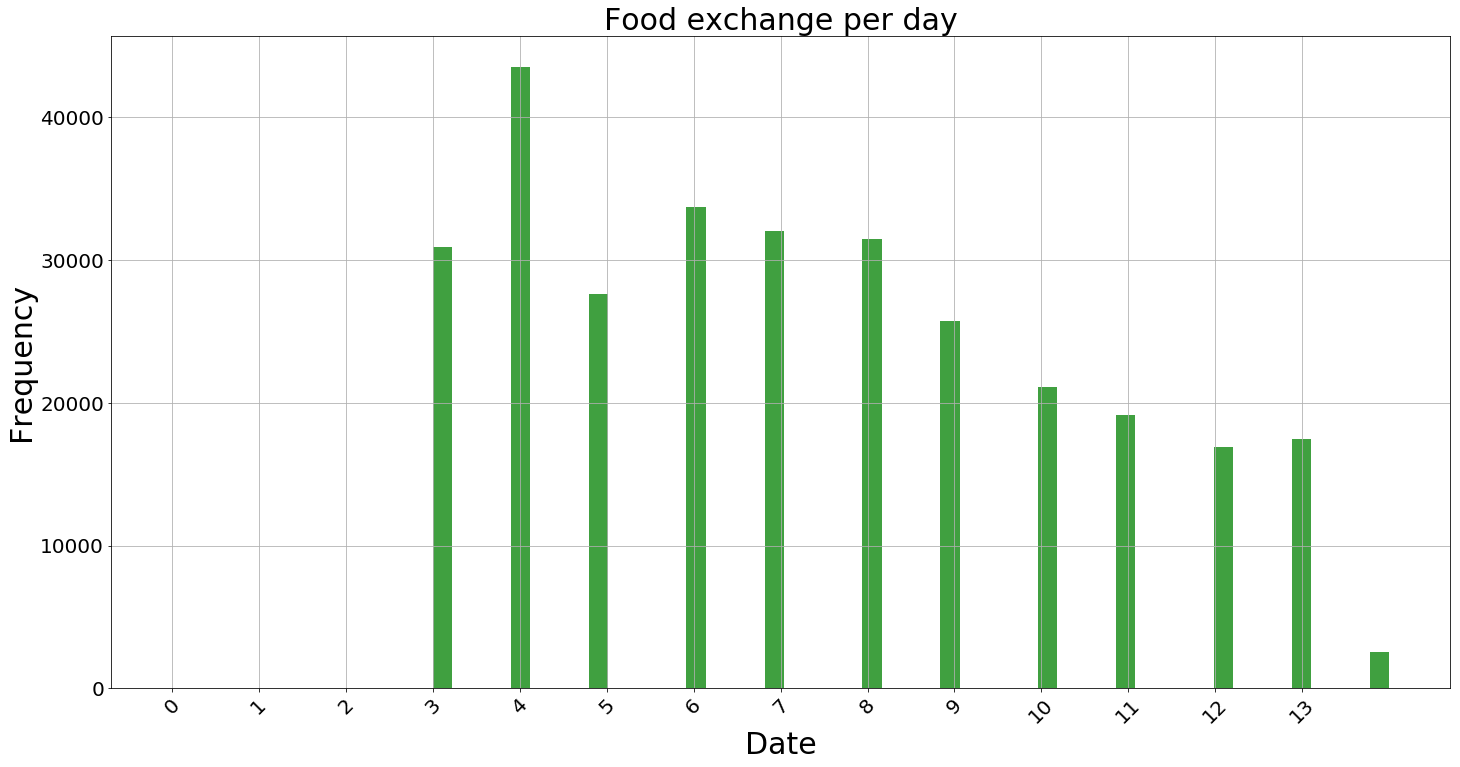

In [15]:
bins = np.linspace (3, 14)
plt.xlabel("Date", fontsize = 30)
plt.ylabel("Frequency", fontsize = 30)
plt.title("Food exchange per day", fontsize = 30)
plt.plot([0], 'k-', lw=2)
plt.xticks(np.arange(0 , 14, 1),  rotation = 45)
plt.grid(True)
plt.hist(data['day'], bins, facecolor='g', alpha=0.75)
plt.show()

In [16]:
plt.scatter(data.day,data.hours)

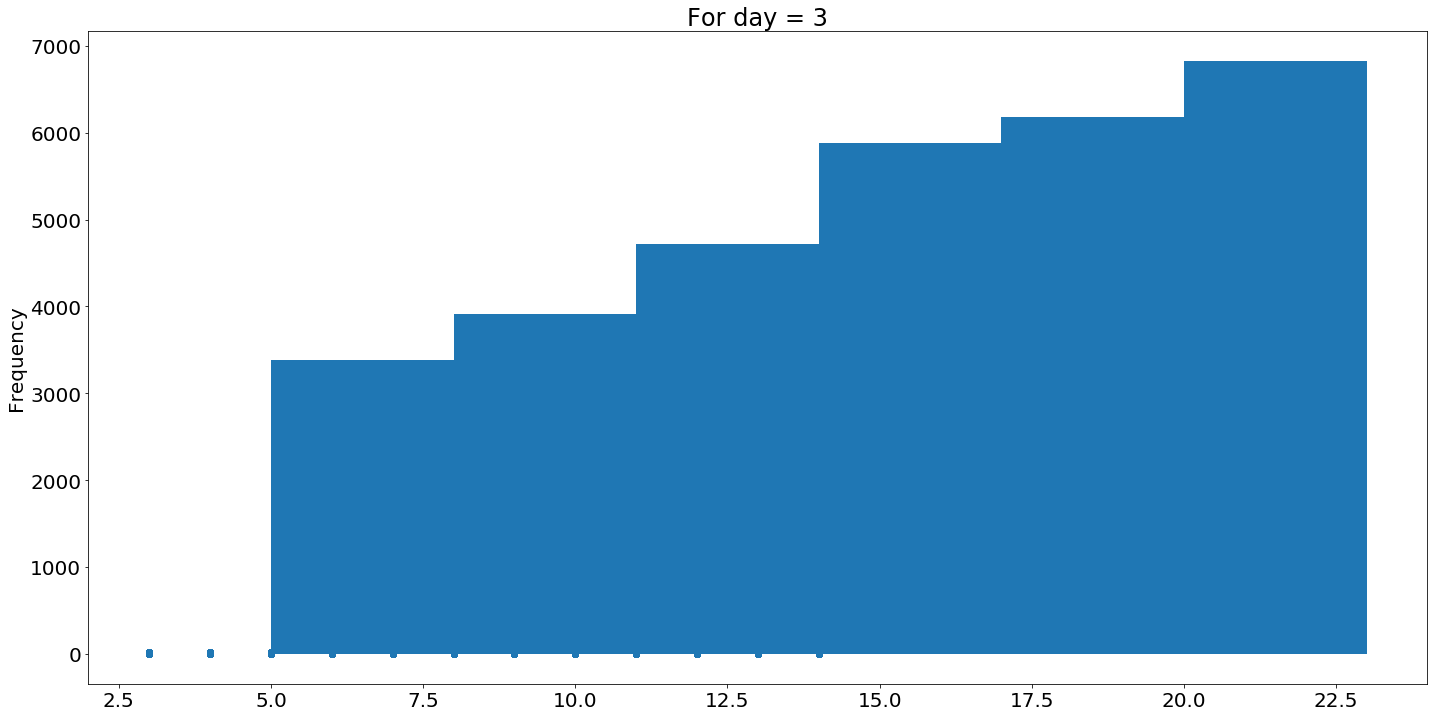

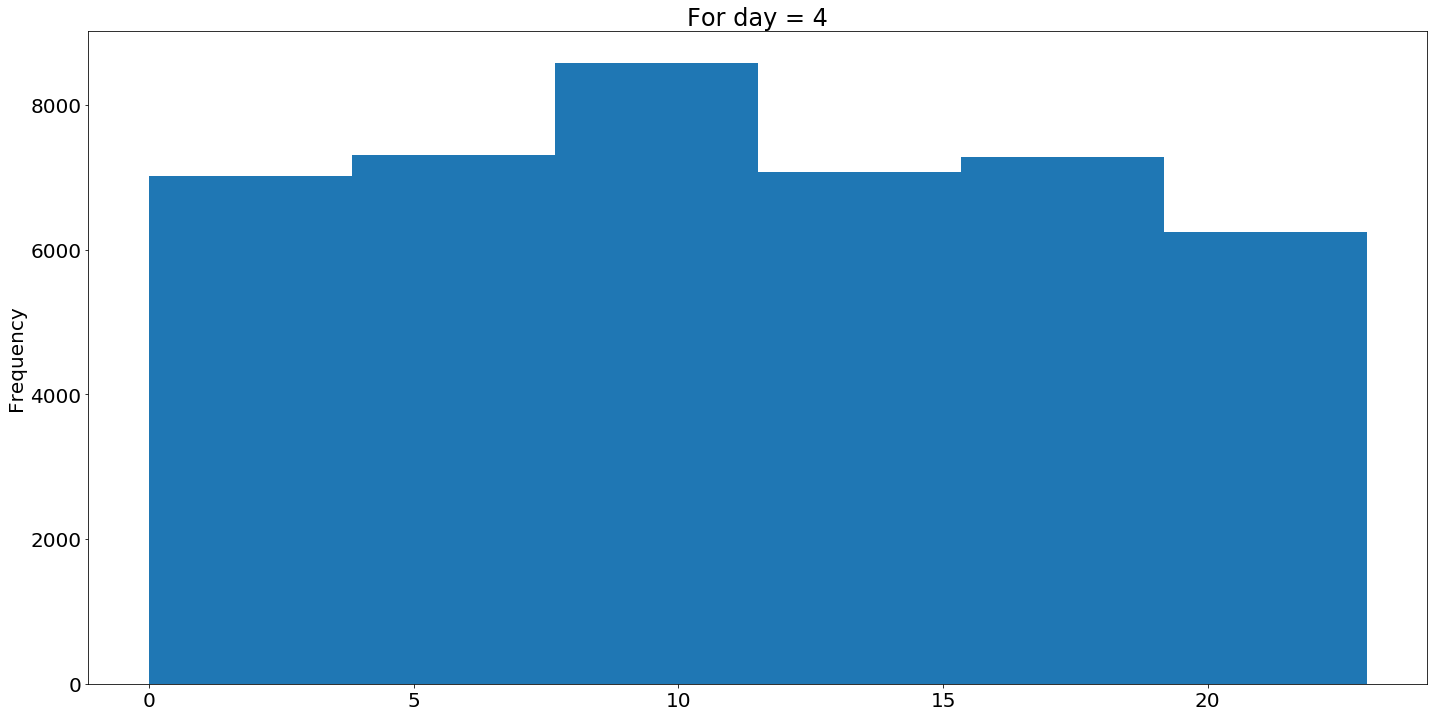

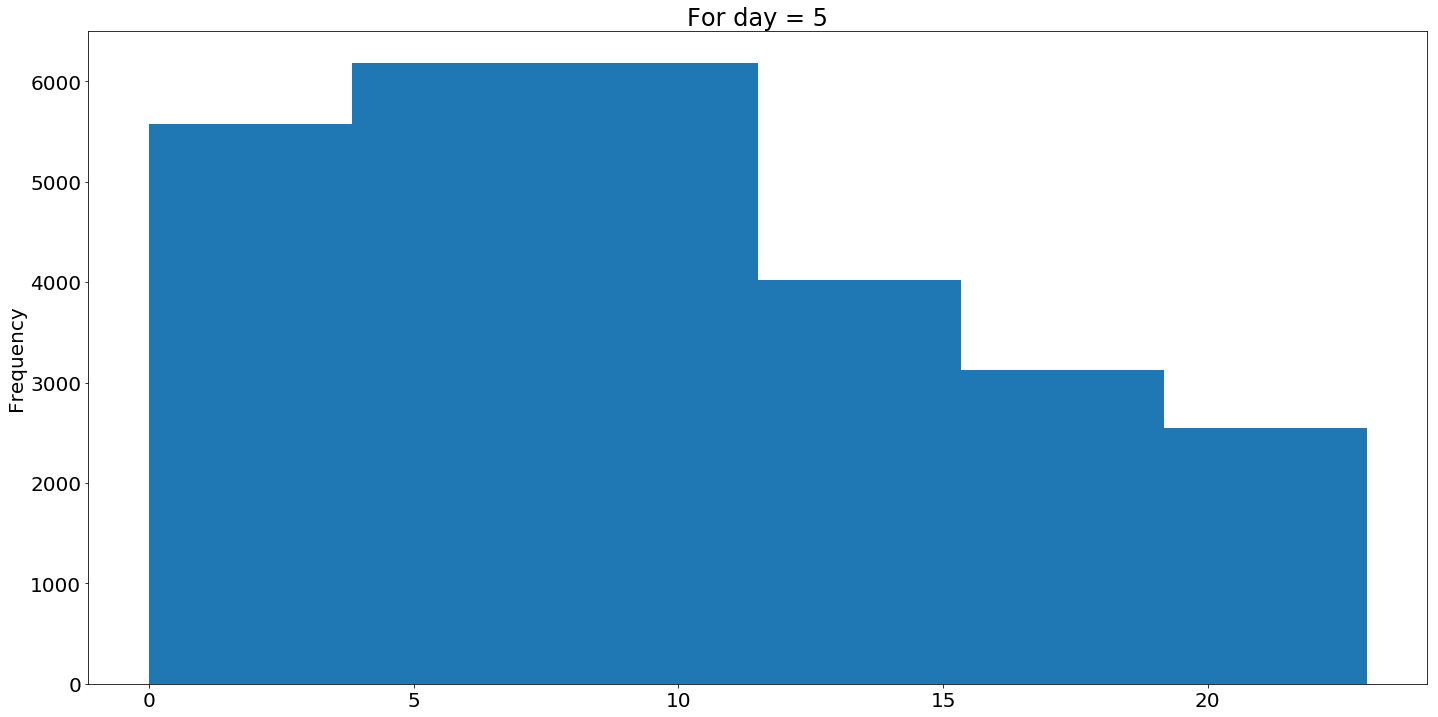

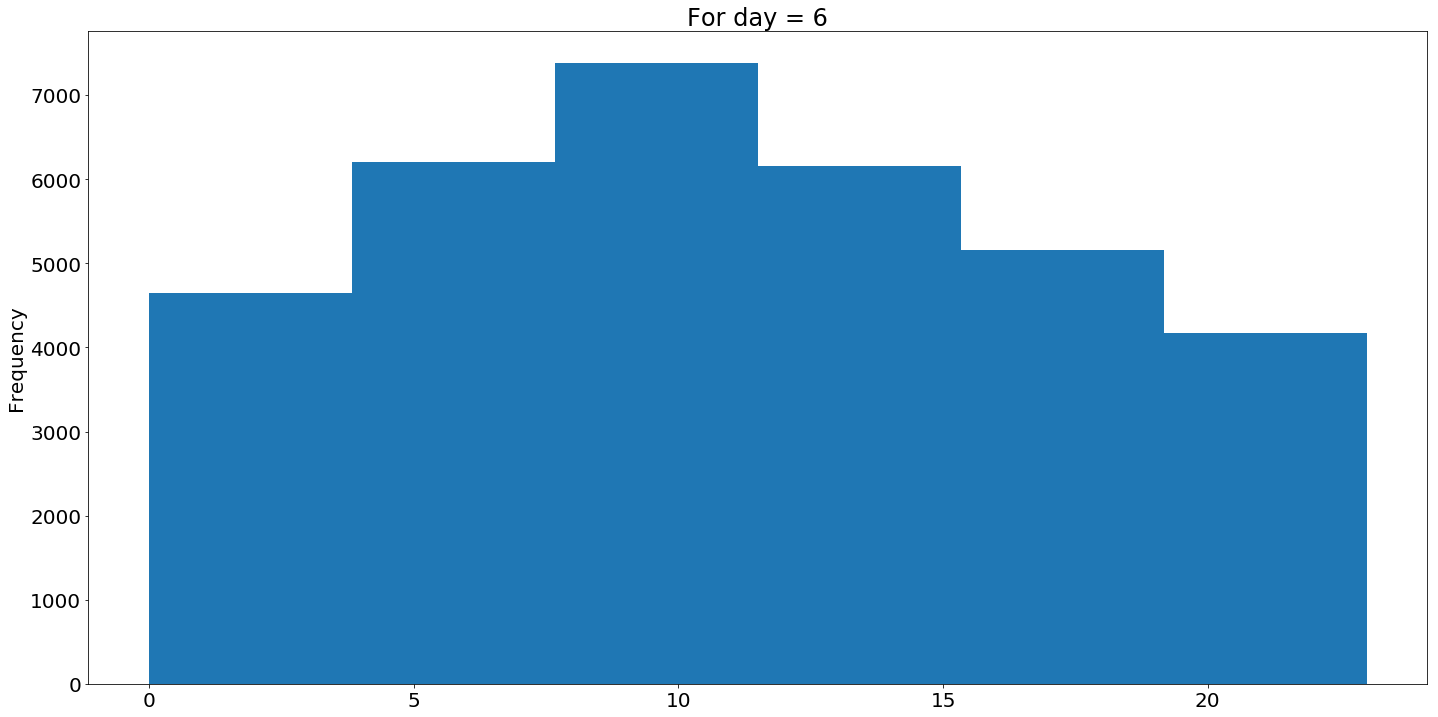

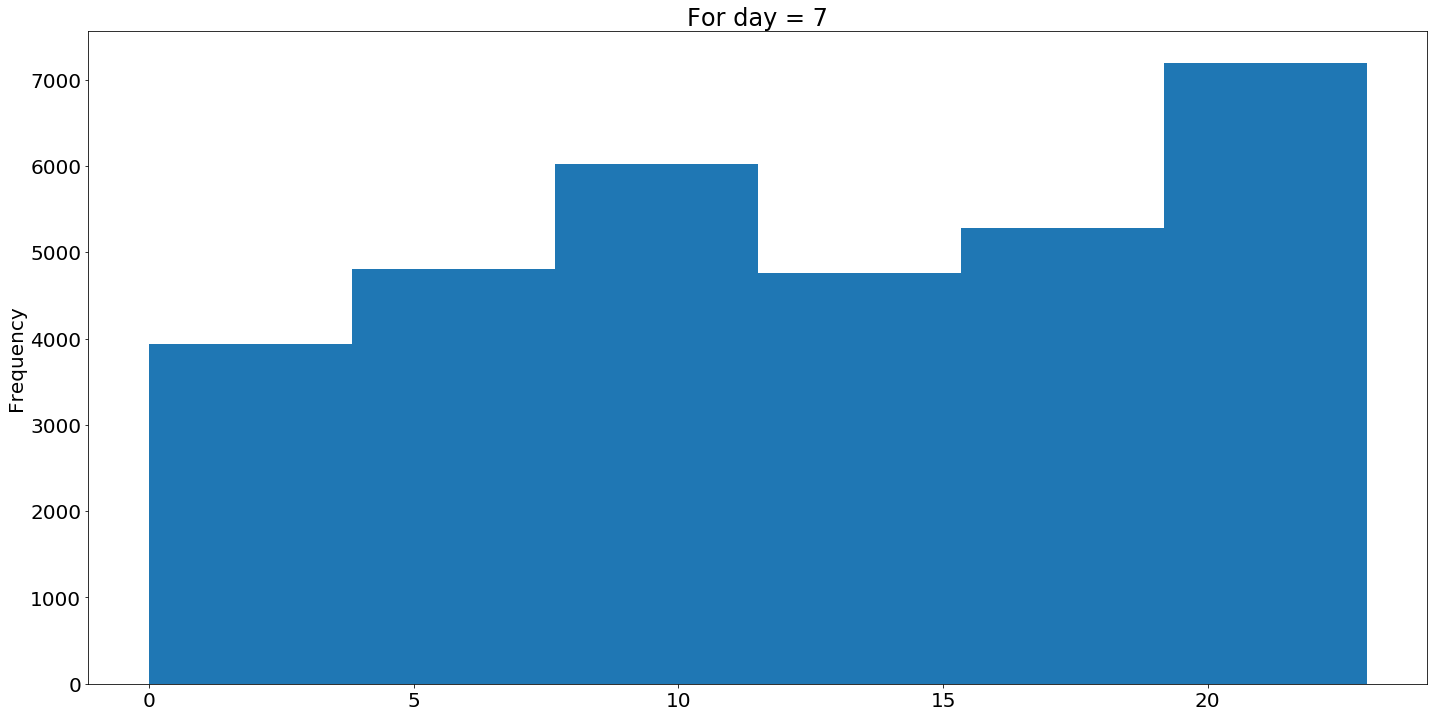

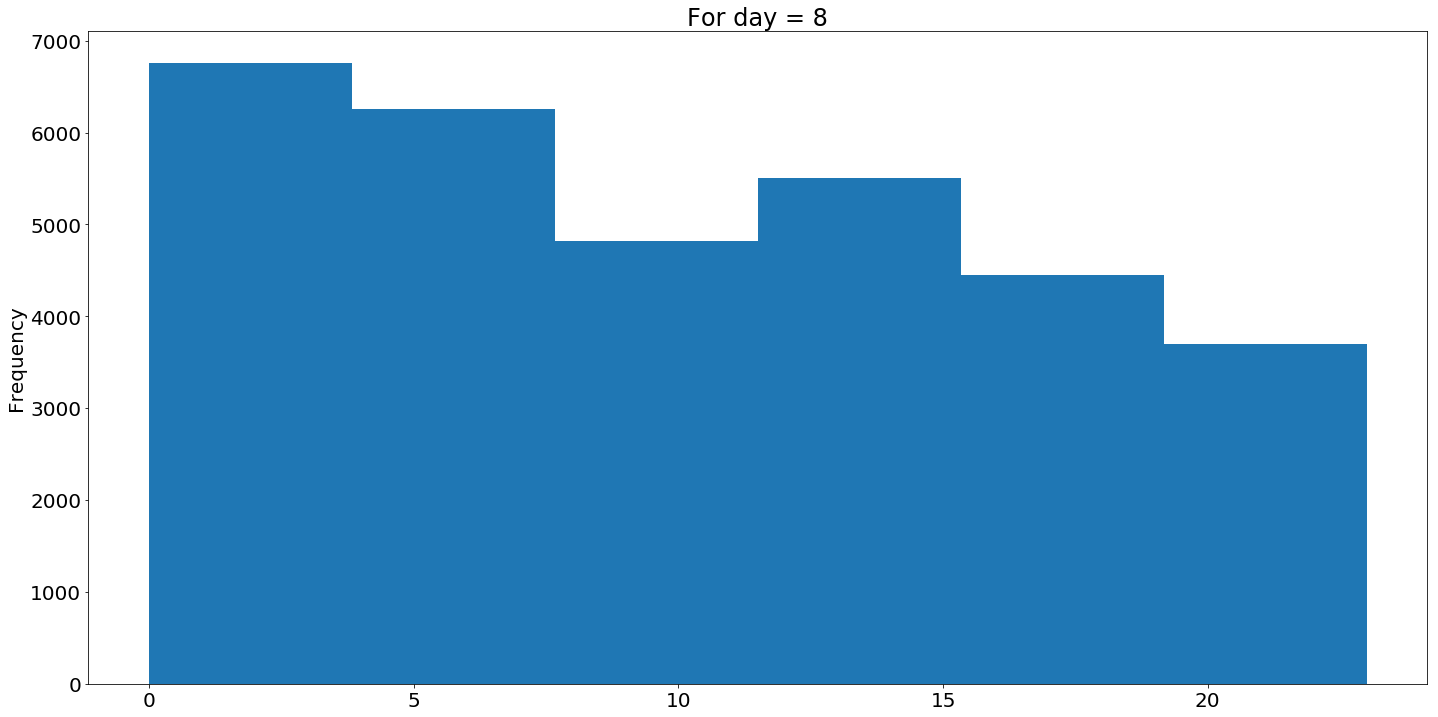

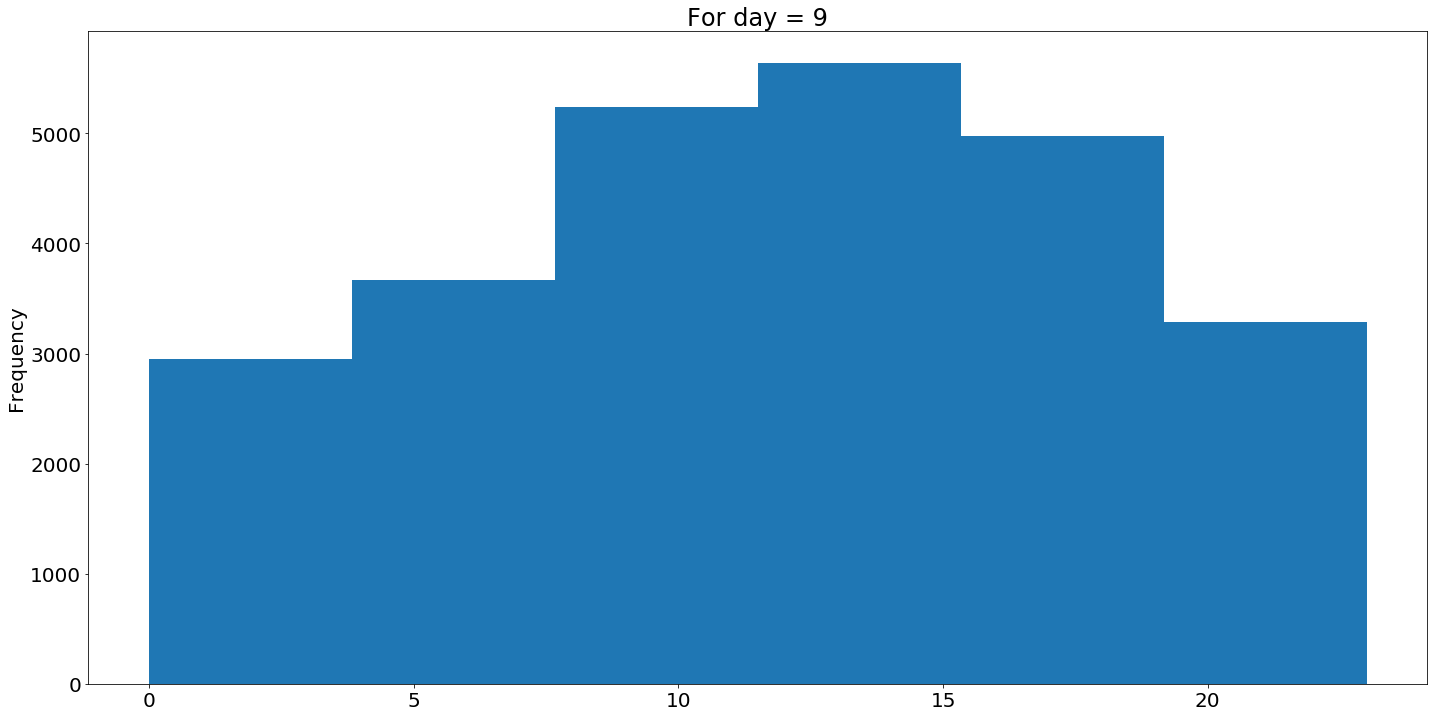

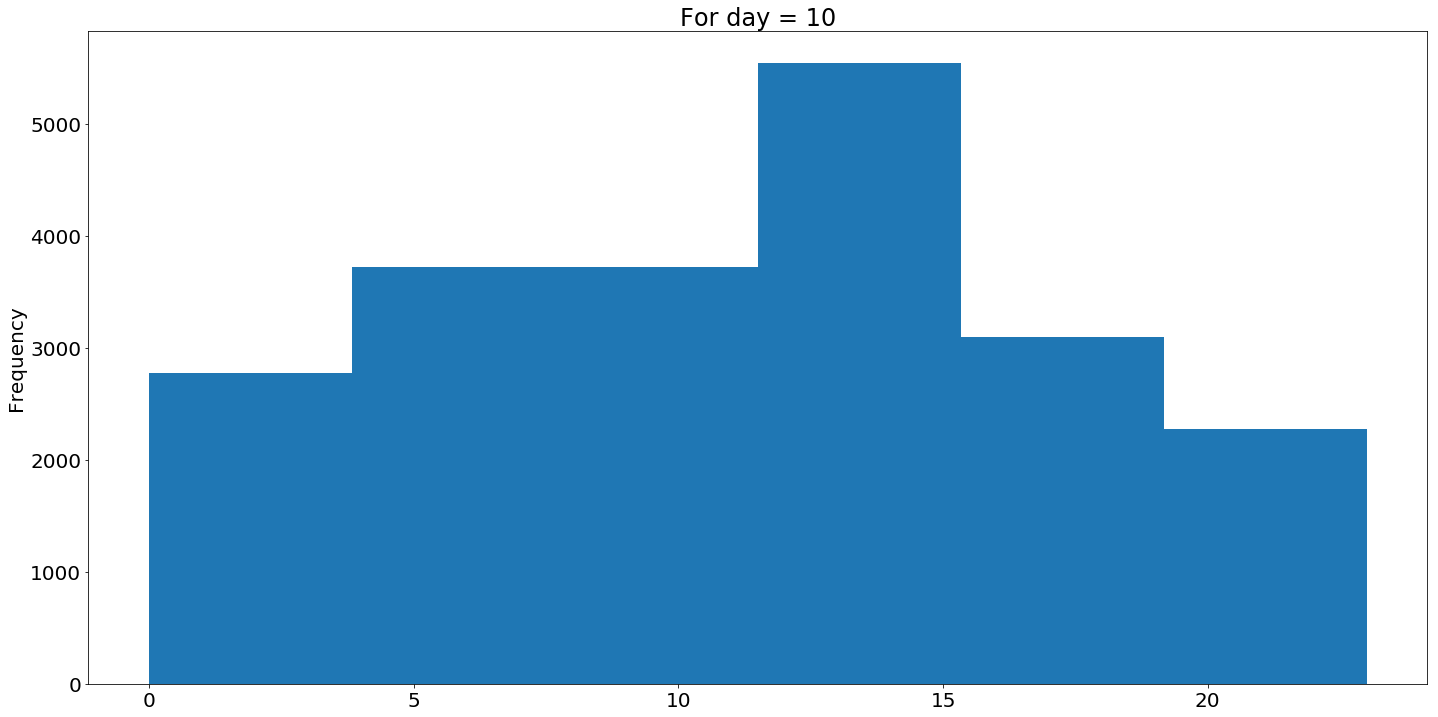

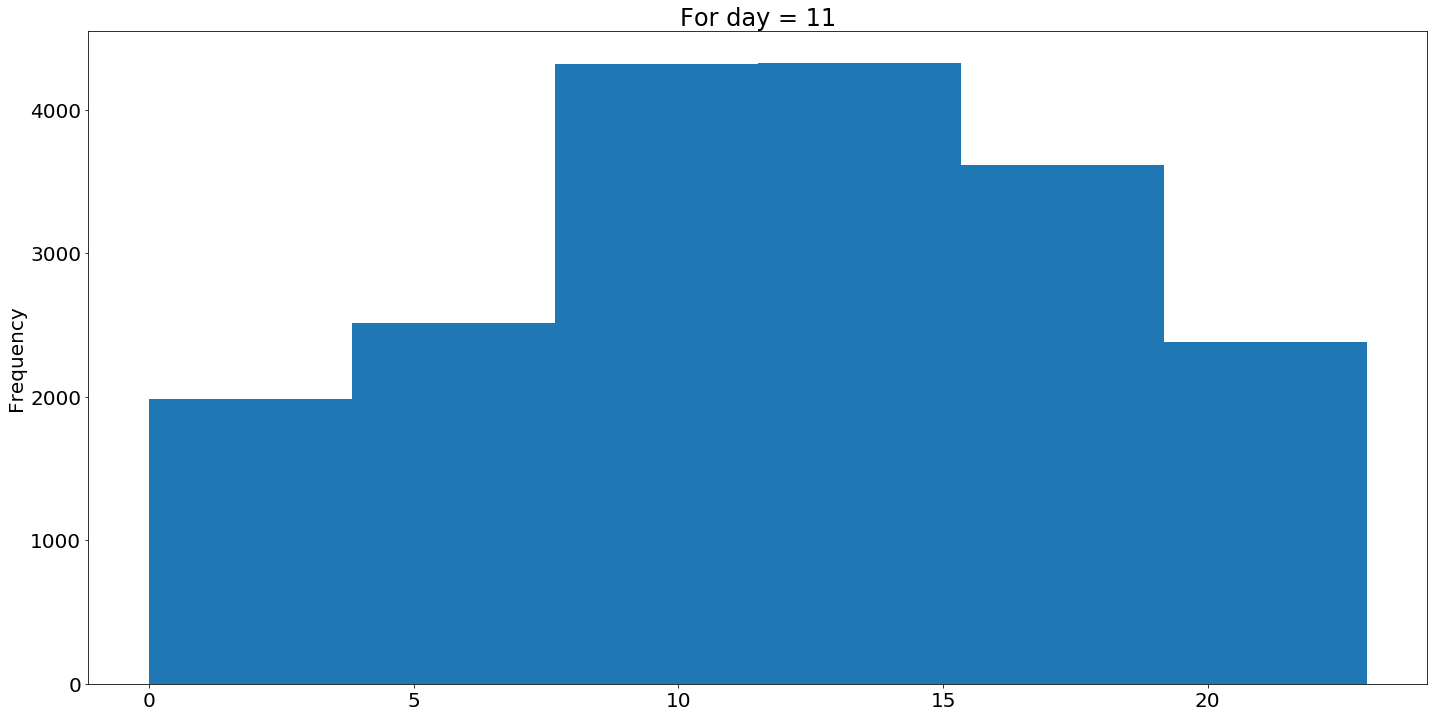

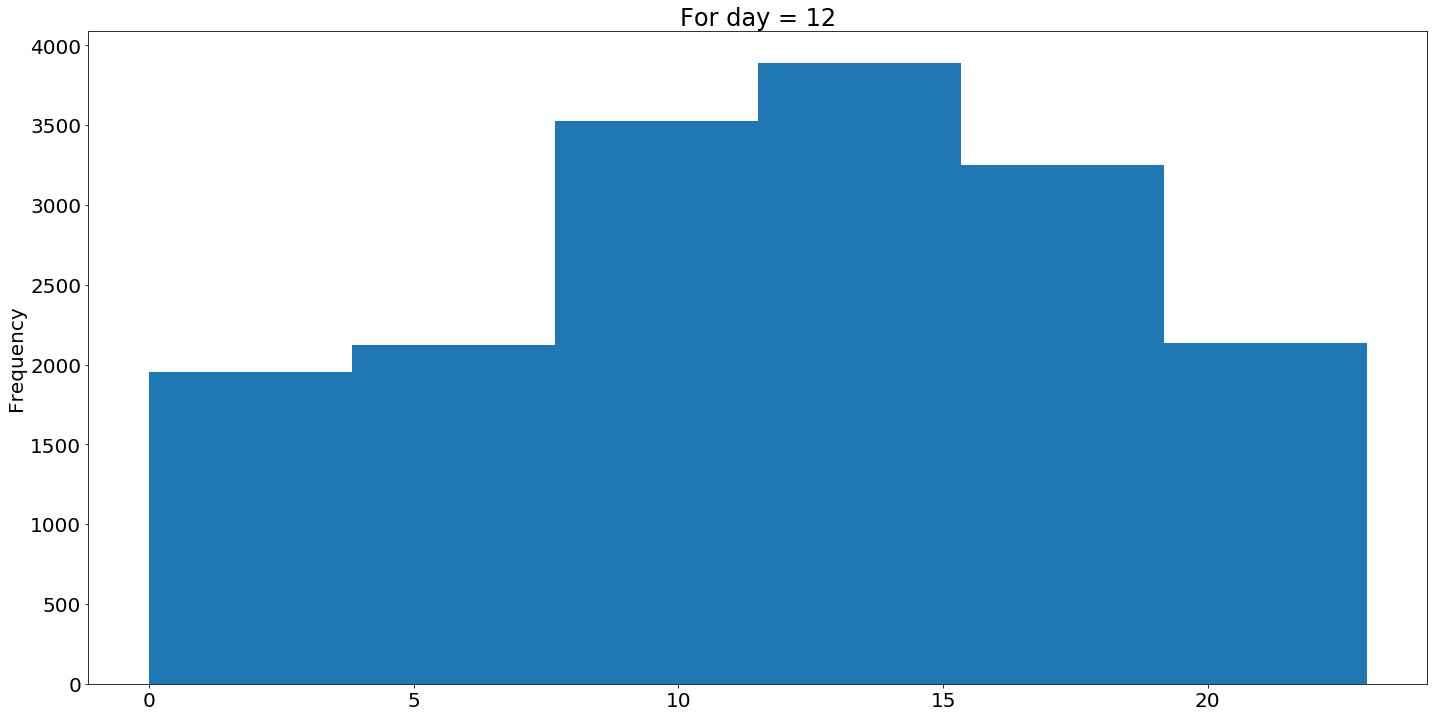

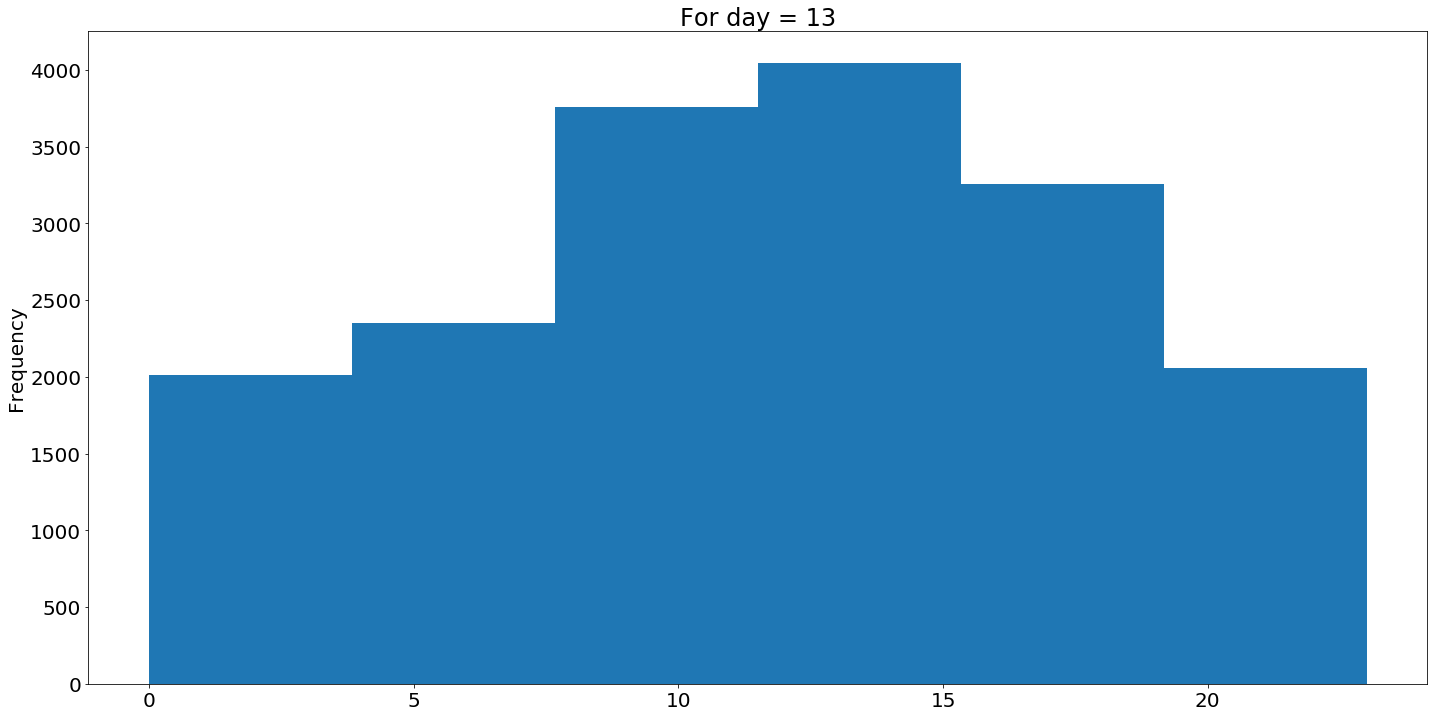

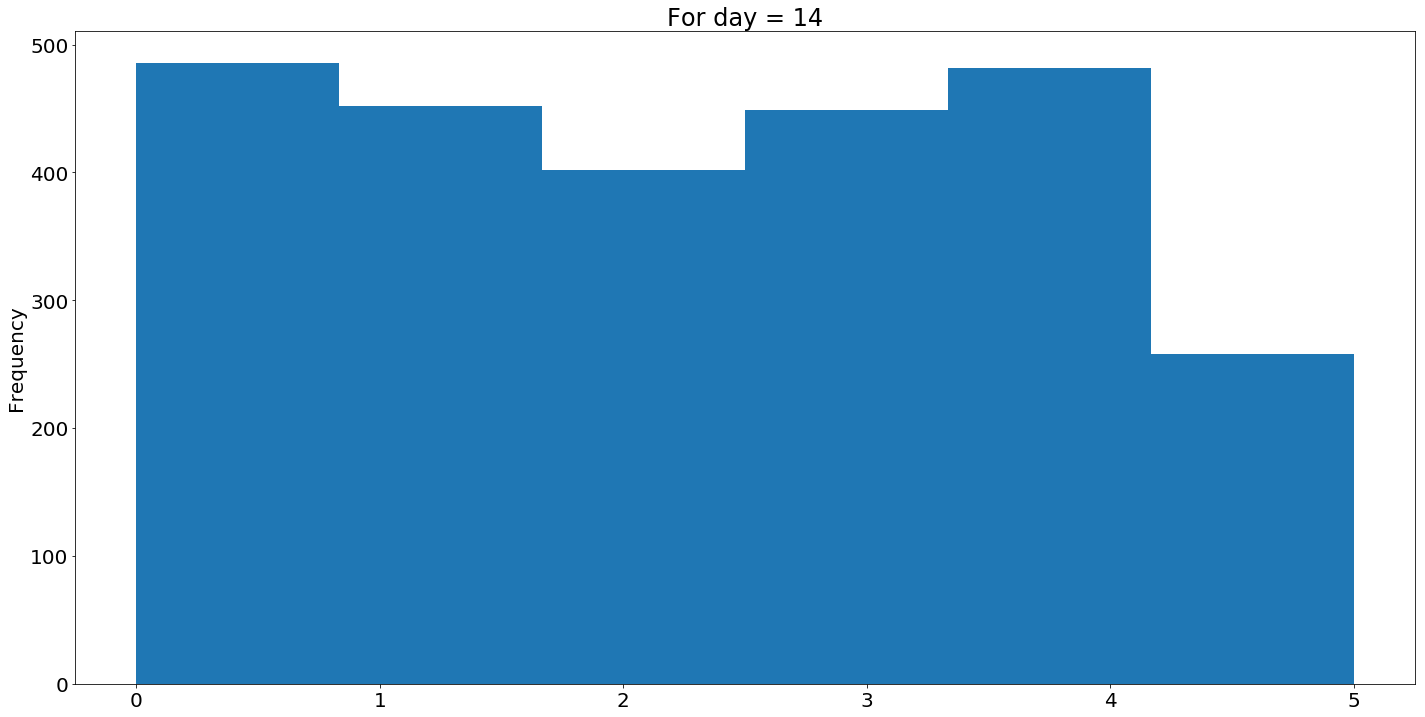

In [17]:
for day in unique_days:
    #print(day)
    day_data = data[data['day'] == day]
    day_data['hours'].plot(kind='hist', bins = 6)
    plt.title("For day = " +str(day))
    plt.show()
    
    

In [18]:
len(data)

302221

In [19]:
data_day_one = data[data['day'] == 3]
len(data_day_one)

30889

In [20]:
data_day_one.head(20)

,trial,id1,id2,begin,end,time,day,UTC,hours
102932,1,612,1697,1.372829e+09,1.372829e+12,3.000,3,2013-07-03 05:29:18,5
138807,1,740,829,1.372829e+09,1.372829e+12,2.000,3,2013-07-03 05:29:23,5
225447,1,1138,1305,1.372829e+09,1.372829e+12,5.999,3,2013-07-03 05:29:32,5
11636,1,267,876,1.372829e+09,1.372829e+12,11.000,3,2013-07-03 05:29:41,5
126121,1,701,912,1.372829e+09,1.372829e+12,10.000,3,2013-07-03 05:29:41,5
119604,1,667,1460,1.372829e+09,1.372829e+12,17.000,3,2013-07-03 05:29:49,5
189002,1,938,1322,1.372829e+09,1.372829e+12,2.000,3,2013-07-03 05:29:52,5
243670,1,1248,1657,1.372829e+09,1.372829e+12,4.000,3,2013-07-03 05:30:18,5
234946,1,1205,1593,1.372829e+09,1.372829e+12,16.999,3,2013-07-03 05:30:25,5
21359,1,288,643,1.372829e+09,1.372829e+12,2.000,3,2013-07-03 05:30:25,5


In [21]:
def hist_graph(x,xlabel,ylabel,title):
    
    x_min = min(x)
    x_max = max(x)
    bins = np.linspace (x_min, x_max)
    
    plt.xlabel(xlabel, fontsize = 50)
    plt.ylabel(ylabel, fontsize = 50)
    plt.title(title, fontsize = 60)
    plt.plot([0], 'k-', lw=2)
    plt.xticks(np.arange(x_min , x_max, 10),  rotation = 45)
    plt.grid(True)
    plt.hist(x, bins, facecolor='g', alpha=0.75)
    plt.show()

In [22]:
def plot_graph(x,y,tau):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.set_xscale("log")
    #ax.set_yscale("log")
    ax.set_title("tau =" + str(tau))
    ax.scatter(x,y,tau)

### Rich Bees are more Bee-g Hearted!

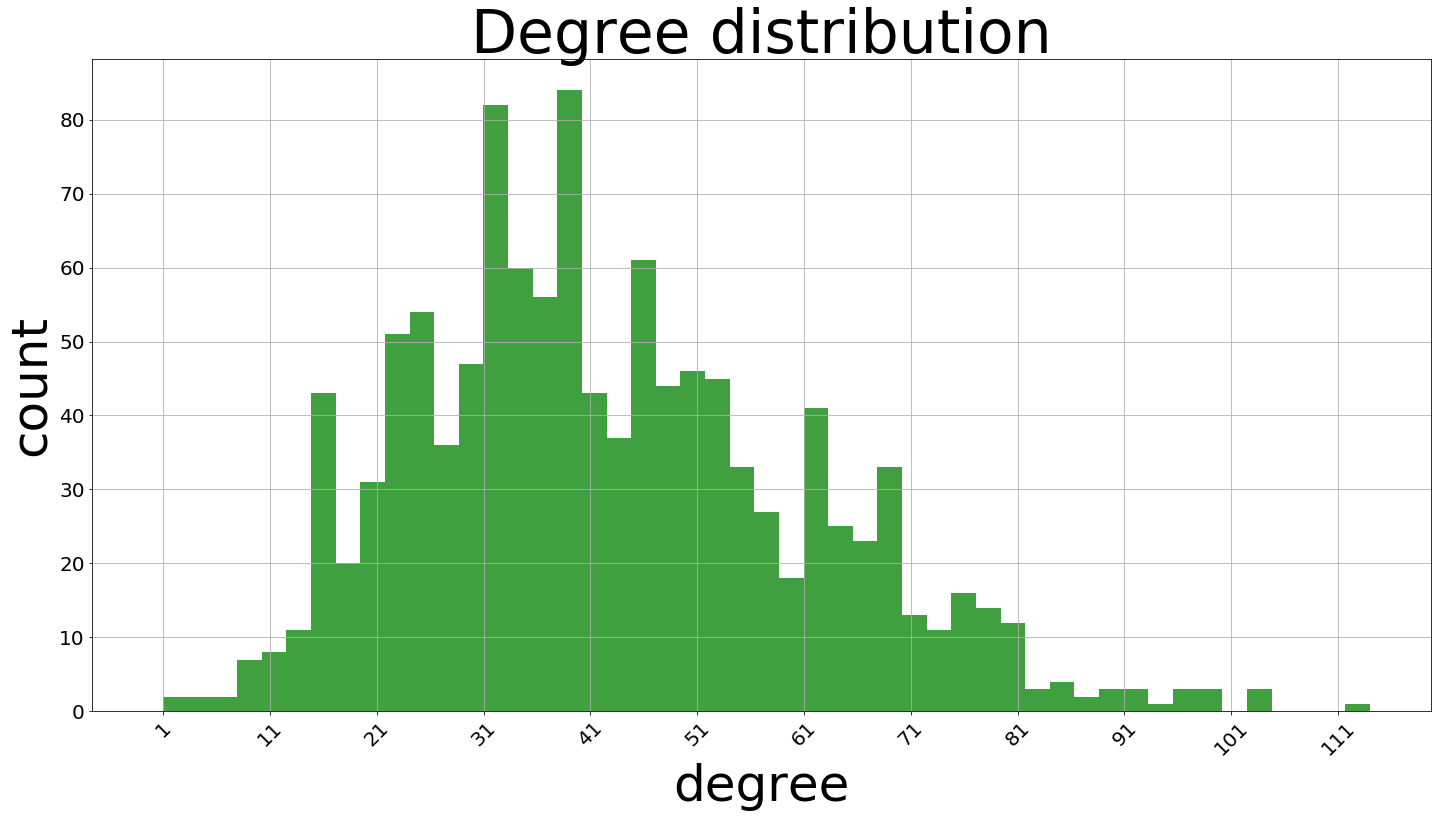

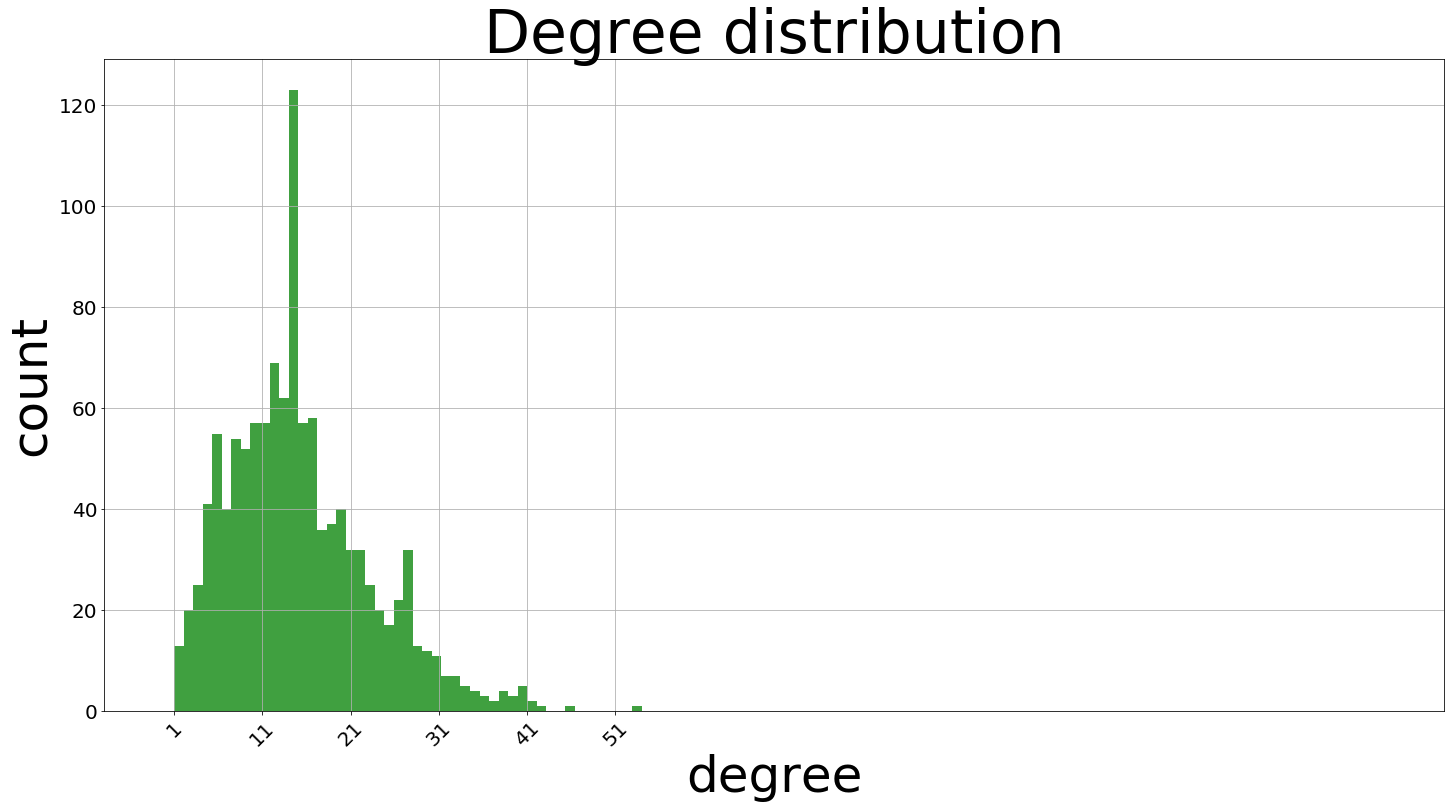

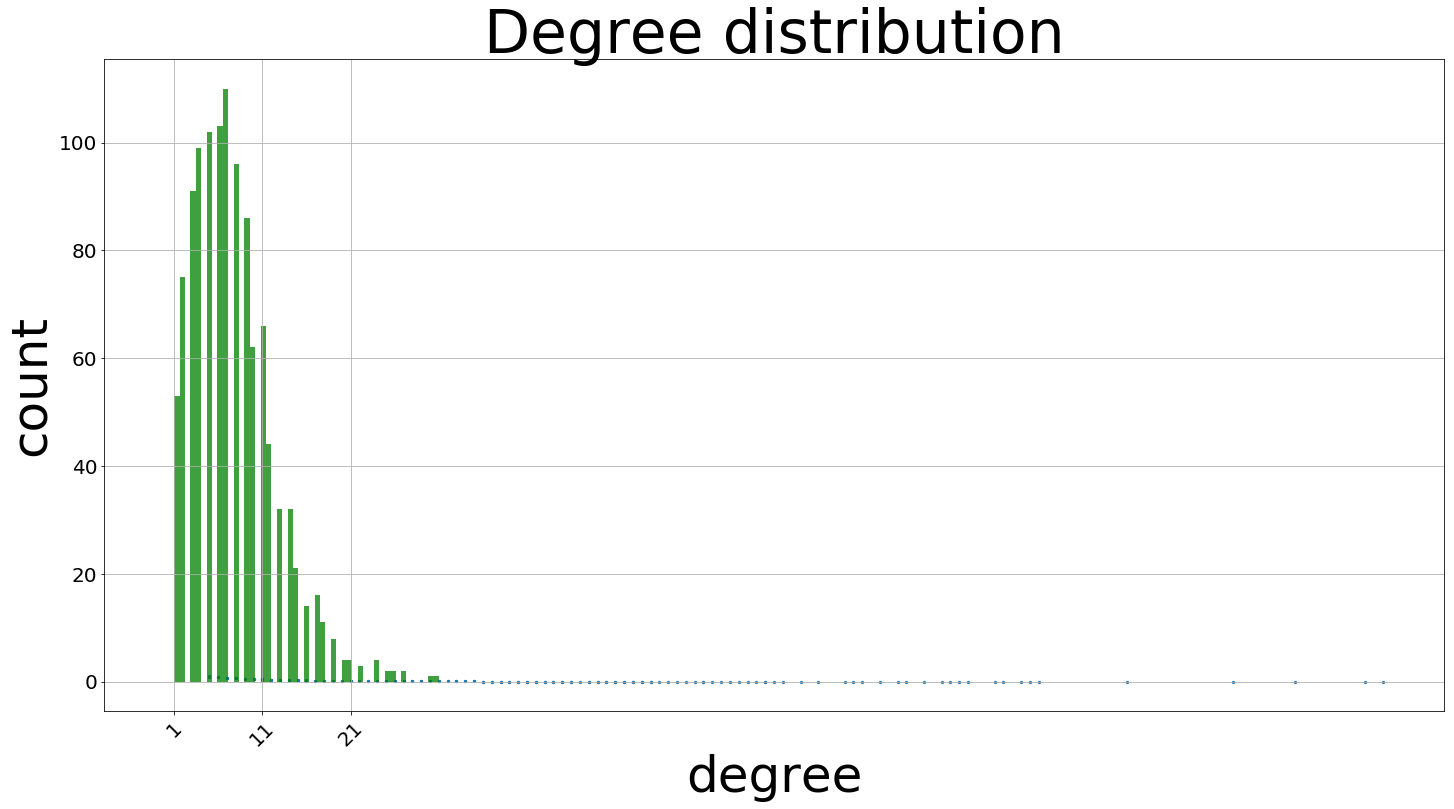

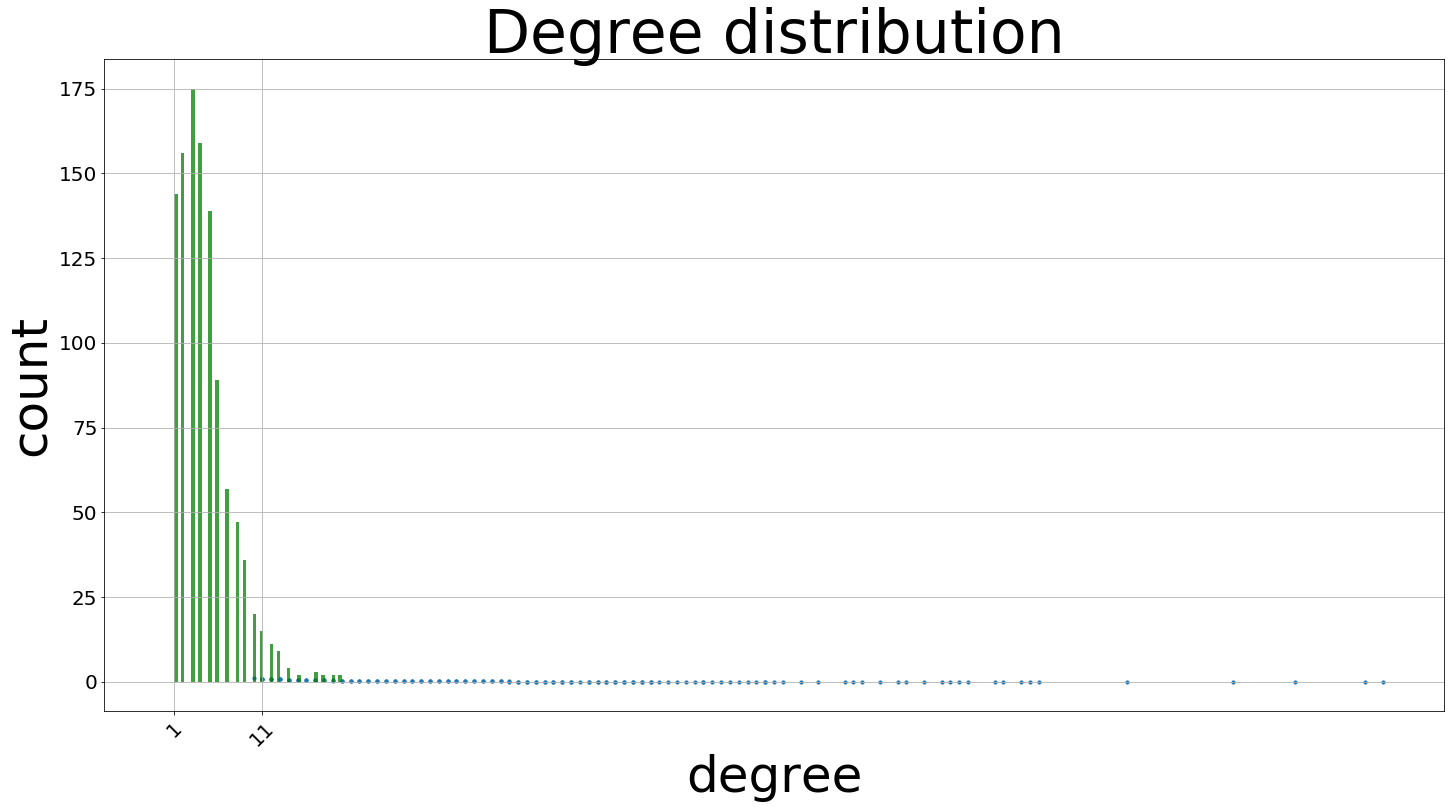

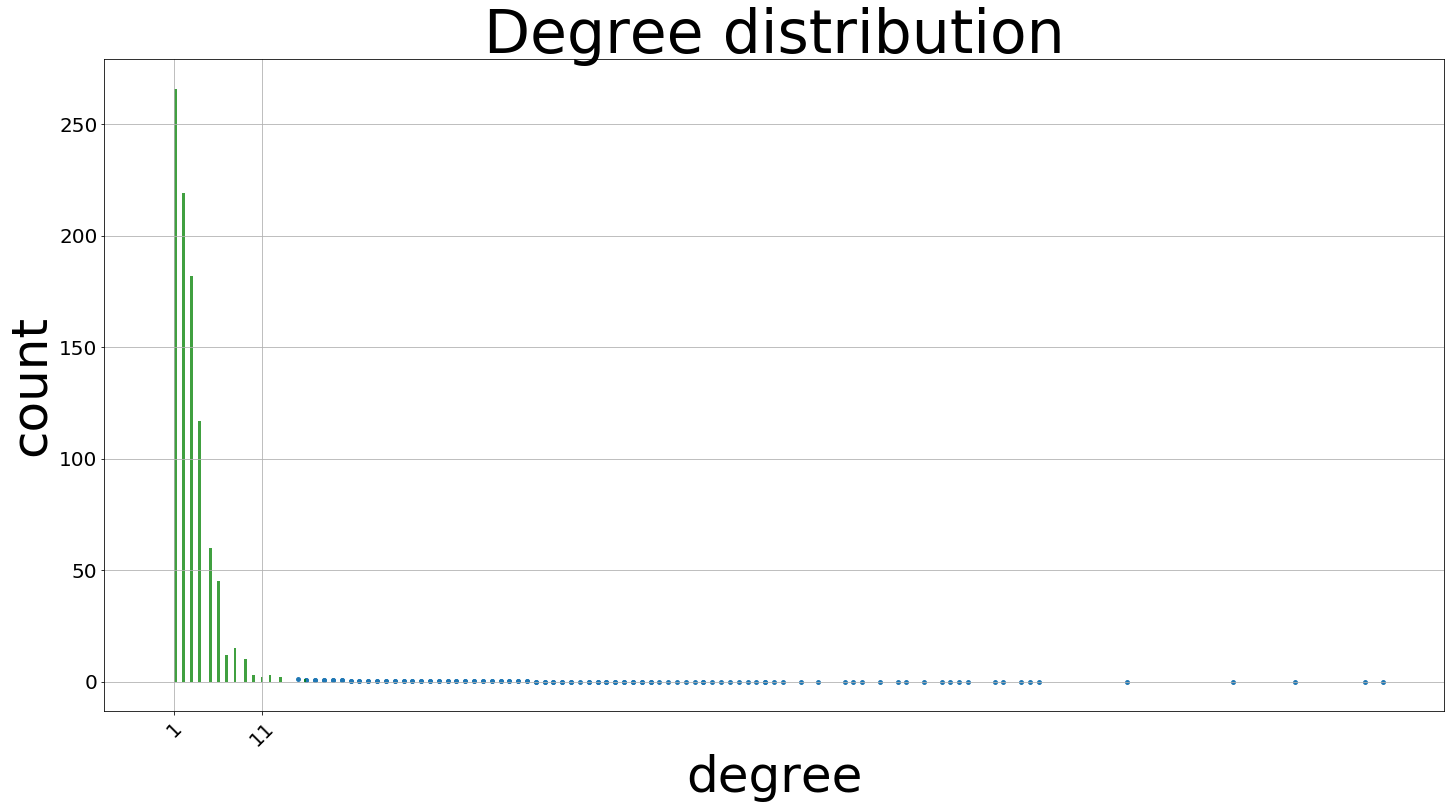

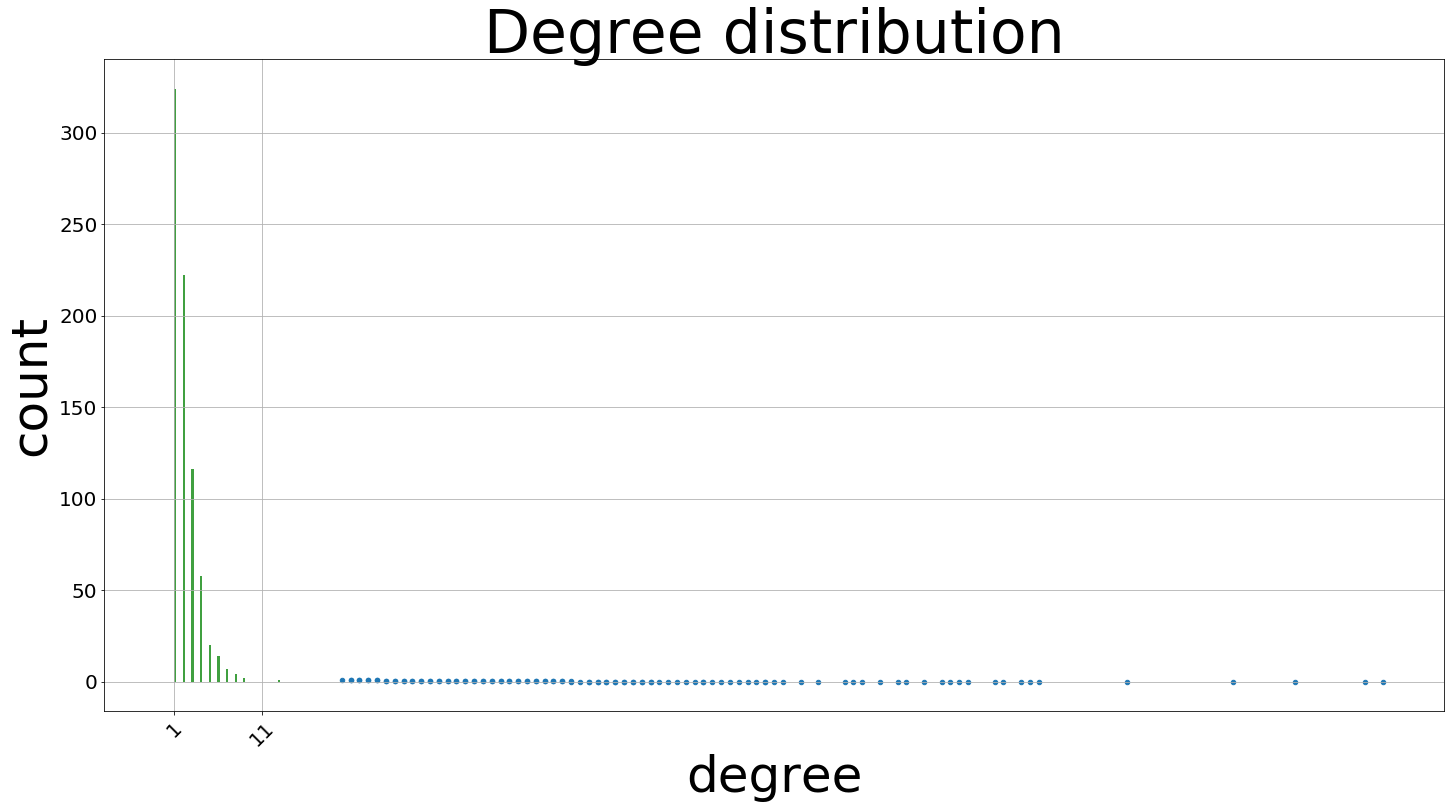

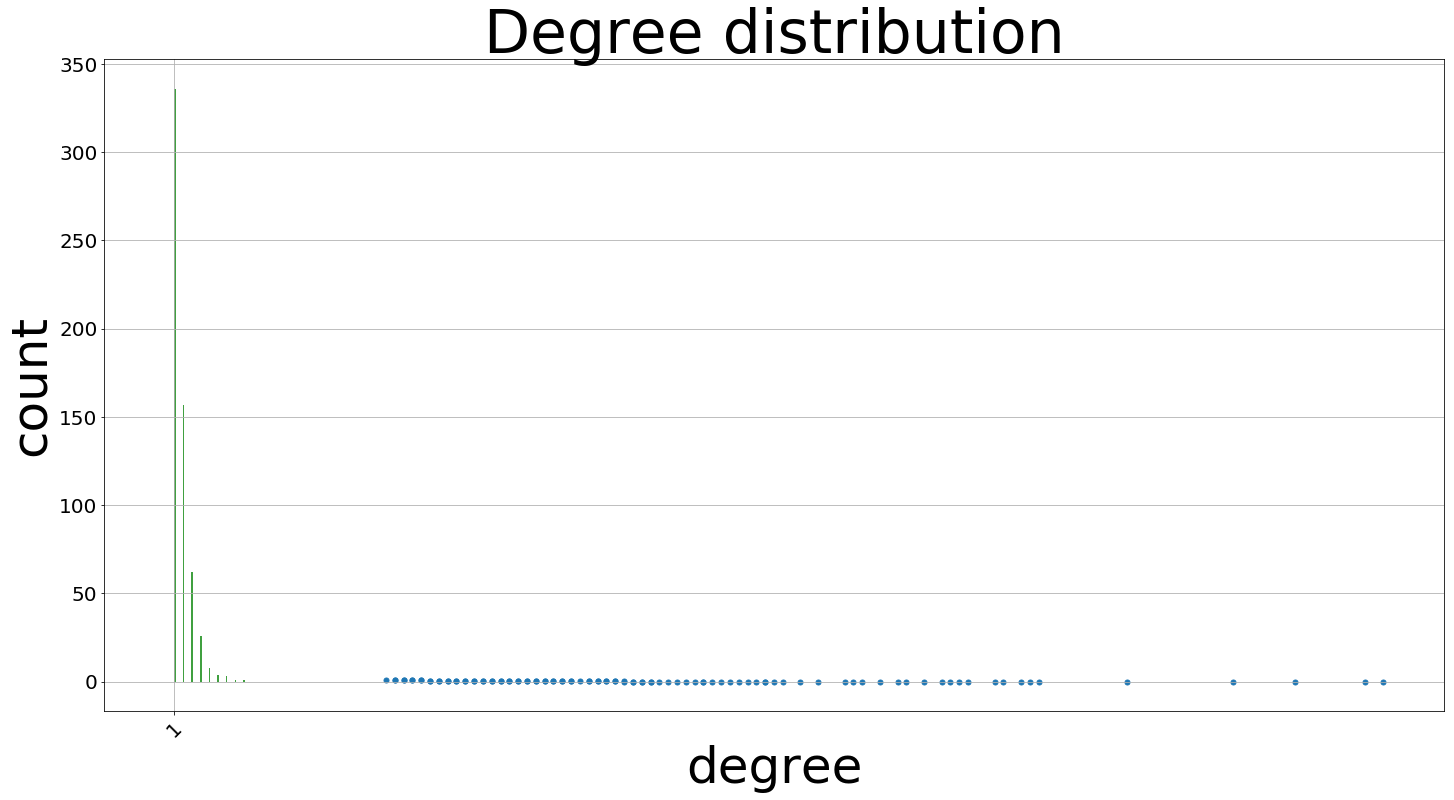

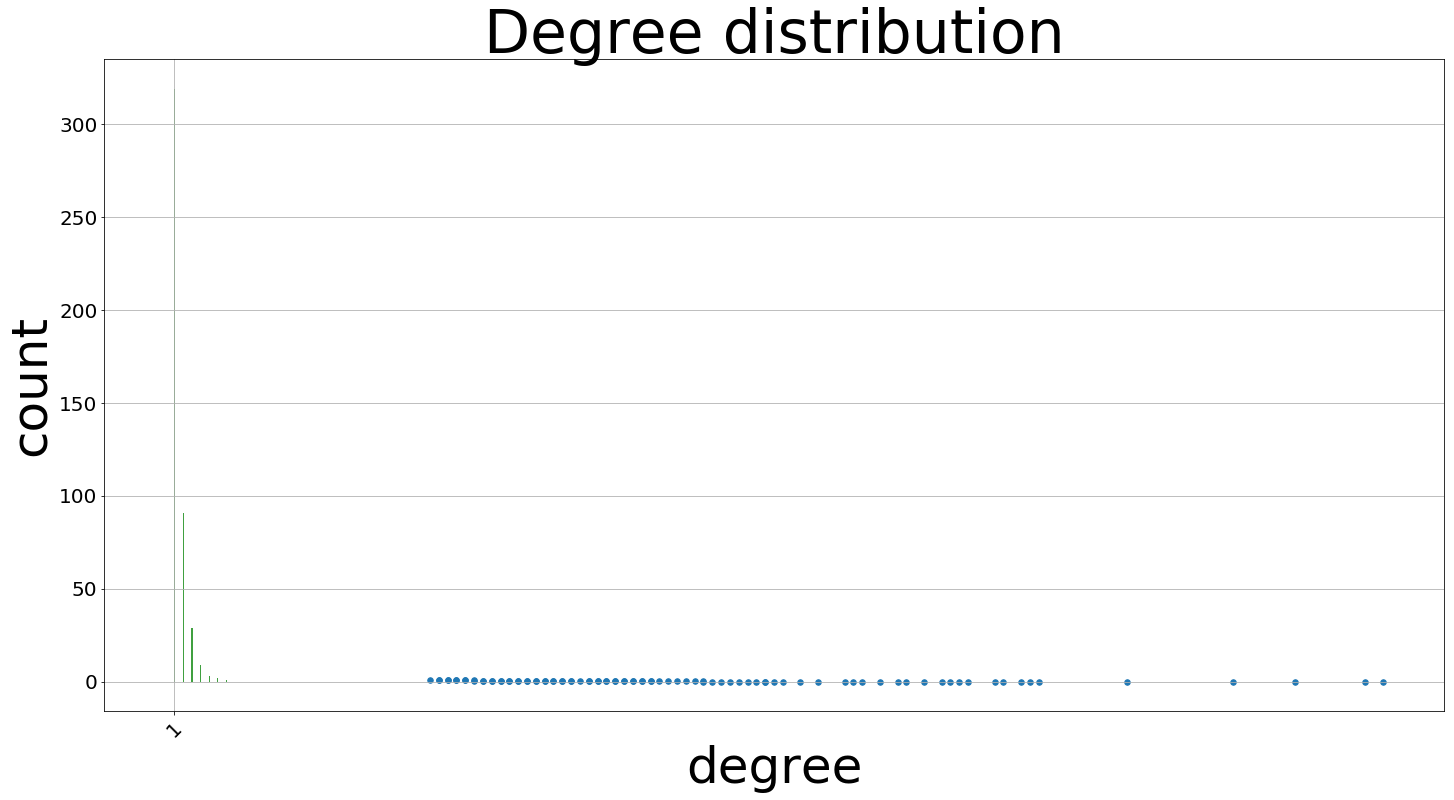

In [25]:
tau_list = [0,5,10,15,20,25,30,35] #for different tau's

food_set_dict = defaultdict(list)
count_of_food_all = data_day_one['time'].value_counts()
count_of_food_dict = defaultdict(int)
for tau in tau_list:
    
    G = nx.Graph()
    food_set = set()
    for index,row in data_day_one.iterrows():

            if row[5] >= tau:
                food_set.add(row[5])
                G.add_edge(row[1],row[2], weight = copy.deepcopy(row[5]))
    food_set_dict[tau] = food_set
   
    
    
    for item in food_set_dict[tau]:
        if item not in count_of_food_all:
            food_set_dict[tau].pop(item, None)
    
    count_of_food = {}
    for item in food_set_dict[tau]:
        if item in count_of_food_all:
            
            count_of_food[item] = count_of_food_all[item]  
    #print(count_of_food)
    count_of_food_dict[tau] = count_of_food
    #print(tau)
    
    sum_of_weights = sum(list(count_of_food_dict[tau].values()))
    
    x = list(count_of_food_dict[tau].keys())
    
    ccdf_food_dict = defaultdict(int)
    for key,val in count_of_food_dict[tau].items():
        s = 0
        list_greater = [i for i in x if key<=i]
        for j in list_greater:
            s += count_of_food[j]

        ccdf_food_dict[key] = s/sum_of_weights
    
    
    
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    #print(degree_sequence)
    hist_graph(degree_sequence,'degree','count','Degree distribution')
    plot_graph(list(ccdf_food_dict.keys()),list(ccdf_food_dict.values()),tau)

    
    

    
#print(count_of_food_dict)

In [26]:
sum_of_weights = sum(list(count_of_food.values()))
sum_of_weights

330

In [27]:
x = list(count_of_food.keys())
x

[51.999,
 51.0,
 52.0,
 135.998,
 137.998,
 53.0,
 54.0,
 55.0,
 59.999,
 60.999,
 35.0,
 36.999,
 37.0,
 38.999,
 35.999,
 40.999,
 40.0,
 41.0,
 43.999,
 44.999,
 42.0,
 46.0,
 43.0,
 45.999,
 42.999,
 50.0,
 48.999,
 52.999,
 53.999,
 54.999,
 55.999,
 56.999,
 36.0,
 50.999,
 37.999,
 57.999,
 61.999,
 58.999,
 63.999,
 38.0,
 65.999,
 66.999,
 67.998,
 61.0,
 39.0,
 39.999,
 71.998,
 69.999,
 73.999,
 64.999,
 68.999,
 76.999,
 77.999,
 78.999,
 41.999,
 80.999,
 82.998,
 83.999,
 49.0,
 85.999,
 67.999,
 87.999,
 88.999,
 89.998,
 90.998,
 93.998,
 94.998,
 44.0,
 96.999,
 97.999,
 98.998,
 45.0,
 46.999,
 62.999,
 108.998,
 47.999,
 48.0,
 49.999,
 120.998,
 127.998]

In [28]:
ccdf_food_dict = defaultdict(int)
for key,val in count_of_food.items():
    s = 0
    list_greater = [i for i in x if key<=i]
    for j in list_greater:
        s += count_of_food[j]
    
    ccdf_food_dict[key] = s/sum_of_weights

        

In [29]:
ccdf_food_dict

defaultdict(int,
            {35.0: 1.0,
             35.999: 0.9606060606060606,
             36.0: 0.9212121212121213,
             36.999: 0.896969696969697,
             37.0: 0.8515151515151516,
             37.999: 0.8242424242424242,
             38.0: 0.7787878787878788,
             38.999: 0.7393939393939394,
             39.0: 0.7,
             39.999: 0.6757575757575758,
             40.0: 0.6515151515151515,
             40.999: 0.6272727272727273,
             41.0: 0.593939393939394,
             41.999: 0.5696969696969697,
             42.0: 0.5393939393939394,
             42.999: 0.5212121212121212,
             43.0: 0.48787878787878786,
             43.999: 0.4666666666666667,
             44.0: 0.44545454545454544,
             44.999: 0.4393939393939394,
             45.0: 0.41515151515151516,
             45.999: 0.40606060606060607,
             46.0: 0.37272727272727274,
             46.999: 0.36363636363636365,
             47.999: 0.3484848484848485,
        

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")

ax.scatter(list(ccdf_food_dict.keys()),list(ccdf_food_dict.values()))


### Adjacency Correlation

In [31]:
#data
data_day_3 = data[data['day'] ==3] #1st day - 3rd of July
data_day_4 = data[data['day'] ==4] #2nd day - 4th of July

In [32]:
print(len(data_day_3))
print(len(data_day_4))

30889
43527


In [33]:
data_day_4.head(20)

,trial,id1,id2,begin,end,time,day,UTC,hours
34706,1,340,1205,1.372896e+09,1.372896e+12,3.000,4,2013-07-04 00:00:00,0
79552,1,506,509,1.372896e+09,1.372896e+12,4.000,4,2013-07-04 00:00:01,0
46541,1,380,1784,1.372896e+09,1.372896e+12,8.000,4,2013-07-04 00:00:05,0
135529,1,732,2038,1.372896e+09,1.372896e+12,5.000,4,2013-07-04 00:00:10,0
277068,1,1552,1833,1.372896e+09,1.372896e+12,14.000,4,2013-07-04 00:00:10,0
46542,1,380,1784,1.372896e+09,1.372896e+12,21.999,4,2013-07-04 00:00:16,0
79553,1,506,509,1.372896e+09,1.372896e+12,4.000,4,2013-07-04 00:00:19,0
223614,1,1118,1468,1.372896e+09,1.372896e+12,7.000,4,2013-07-04 00:00:21,0
70143,1,481,880,1.372896e+09,1.372896e+12,2.000,4,2013-07-04 00:00:25,0
260686,1,1415,2024,1.372896e+09,1.372896e+12,2.000,4,2013-07-04 00:00:25,0


In [34]:

#fav_b_list = np.random.choice(list(data_day_3.id2.unique()),20, replace = False)
fav_b_list =  [1543,1671,1667,959,880,918,1484,1764,1966,1047]
#fav_b_list = [1671]
corr_list = []
for fav_b in fav_b_list:
    corr = 0
    fav_b_data_day_3 = data_day_3[data_day_3['id1'] == fav_b] 
    fav_b_data_day_4 = data_day_4[data_day_4['id1'] == fav_b]
    #print(fav_b_data_day_4)
    set_day_3 = set(fav_b_data_day_3.id2.unique())
    set_day_4 = set(fav_b_data_day_4.id2.unique())
    #print(set_day_3)
    num = len(set_day_3.intersection(set_day_4))
    #print(num)
    #print(len(set_day_3))
    corr = num/(math.sqrt(len(set_day_3)*len(set_day_4)))
    corr_list.append(corr)
    print("For"+str(fav_b)+ ",Correlation ="+ str(corr))

For1543,Correlation =0.1690308509457033
For1671,Correlation =0.13511320473331348
For1667,Correlation =0.08006407690254357
For959,Correlation =0.04109974682633932
For880,Correlation =0.06780635036208105
For918,Correlation =0.062070441645177596
For1484,Correlation =0.0
For1764,Correlation =0.0
For1966,Correlation =0.1336306209562122
For1047,Correlation =0.06123724356957946


In [35]:
fav_b_list = [1484]
for fav_b in fav_b_list:
    fav_b_data_day_3 = data_day_3[data_day_3['id1'] == fav_b] 
    set_hours = set(fav_b_data_day_3.hours.unique())
    print(set_hours)

{7, 8, 11, 13, 14, 15, 16, 17, 21, 22, 23}


In [36]:
bee_list = []
count = 0
while(count<=10):
    node_index =  np.random.choice(list(data_day_3.index),1, replace = False)
    #print(node_index)
    node_id = data_day_3.at[node_index[0],'id1']
    node_id_df = data_day_3[data_day_3['id1'] == node_id]
    #print(node_id_df)
    hours = data_day_3.at[node_index[0],'hours']
    if (hours+1) in node_id_df.hours.values:
        bee_list.append(node_id)
        count+=1
    #print((hours+1) in node_id_df.hours.values)
    #print(data_day_3.loc[node_index,:])
    #print(hours)
    
print(bee_list)    
    

[767, 386, 1048, 600, 333, 1115, 911, 660, 266, 628, 1396]


In [37]:
corr_list = []
for fav_b in bee_list:
    corr = 0
    fav_b_data_day_3 = data_day_3[data_day_3['id1'] == fav_b] 
    fav_b_data_day_4 = data_day_4[data_day_4['id1'] == fav_b]
    #print(fav_b_data_day_4)
    set_day_3 = set(fav_b_data_day_3.id2.unique())
    set_day_4 = set(fav_b_data_day_4.id2.unique())
    #print(set_day_3)
    num = len(set_day_3.intersection(set_day_4))
    #print(num)
    #print(len(set_day_3))
    corr = num/(math.sqrt(len(set_day_3)*len(set_day_4)))
    corr_list.append(corr)
    print("For"+str(fav_b)+ ",Correlation ="+ str(corr))

For767,Correlation =0.02050230920261824
For386,Correlation =0.06956083436402524
For1048,Correlation =0.05157106231293967
For600,Correlation =0.0904616275314925
For333,Correlation =0.03892494720807615
For1115,Correlation =0.06537204504606134
For911,Correlation =0.08934271123648291
For660,Correlation =0.08866586276648858
For266,Correlation =0.06868028197434452
For628,Correlation =0.0999800059980007
For1396,Correlation =0.06818181818181818


In [55]:
bee_list_hours = []
count = 0
#window = (4,5)
while(len(bee_list_hours) != 500):
    node_index =  np.random.choice(list(data_day_3.index),1, replace = False)
    node_id = data_day_3.at[node_index[0],'id1']
    node_id_df = data_day_3[data_day_3['id1'] == node_id]
   # print(node_id_df)
    hours = data_day_3.at[node_index[0],'hours']
    #if window[0] in node_id_df.hours.values and window[1] in node_id_df.hours.values:
        #print(node_index[0])
        #bee_list_hours.append(node_index[0])
    if (hours+1) in node_id_df.hours.values:
        bee_list_hours.append(node_index[0])
        count+=1
    
print(bee_list_hours)   

[2405, 39192, 136983, 283577, 247405, 16200, 174099, 165779, 110839, 145043, 159308, 223419, 44550, 99948, 3365, 62604, 292239, 9288, 15835, 102032, 211626, 162881, 132137, 152333, 238676, 40595, 99792, 122582, 300398, 8855, 3099, 129608, 22177, 123683, 133870, 34472, 33722, 1149, 207849, 247528, 190821, 65486, 289507, 19604, 179345, 35579, 288862, 23860, 130137, 111168, 212334, 147638, 105669, 66580, 205130, 258916, 234617, 23686, 25897, 248002, 185767, 26152, 256850, 122267, 250888, 189343, 136822, 259856, 63112, 68159, 134890, 216374, 168251, 172128, 167202, 49127, 5320, 131517, 18776, 211908, 50592, 1830, 239944, 190576, 262837, 250524, 130922, 195264, 239134, 86934, 87445, 48337, 47785, 86527, 255624, 24548, 80161, 242557, 250160, 178201, 104453, 59631, 40710, 191809, 62950, 148307, 119666, 5128, 93221, 64756, 297871, 174221, 169804, 52450, 43713, 60724, 126815, 150137, 216714, 41253, 219692, 19827, 73077, 114516, 171021, 172134, 63474, 141554, 126690, 45784, 238228, 32809, 107791

In [56]:
df_hr_format = data_day_3.loc[bee_list_hours,:]

In [57]:
df_hr_format

,trial,id1,id2,begin,end,time,day,UTC,hours
2405,1,241,1054,1.372885e+09,1.372885e+12,9.0,3,2013-07-03 21:00:14,21
39192,1,351,1318,1.372885e+09,1.372885e+12,5.0,3,2013-07-03 20:55:47,20
136983,1,735,1919,1.372868e+09,1.372868e+12,3.0,3,2013-07-03 16:20:11,16
283577,1,1629,1993,1.372871e+09,1.372871e+12,2.0,3,2013-07-03 17:07:03,17
247405,1,1279,1294,1.372872e+09,1.372872e+12,9.0,3,2013-07-03 17:13:49,17
16200,1,277,1470,1.372876e+09,1.372876e+12,3.0,3,2013-07-03 18:23:28,18
174099,1,880,1294,1.372856e+09,1.372856e+12,6.0,3,2013-07-03 12:56:14,12
165779,1,851,1998,1.372890e+09,1.372890e+12,14.0,3,2013-07-03 22:13:09,22
110839,1,638,1477,1.372871e+09,1.372871e+12,2.0,3,2013-07-03 17:08:21,17
145043,1,758,1163,1.372870e+09,1.372870e+12,2.0,3,2013-07-03 16:50:10,16


In [62]:
df_hr_format

df_hr_18 = df_hr_format[df_hr_format['hours'] == 18]

,trial,id1,id2,begin,end,time,day,UTC,hours
16200,1,277,1470,1.372876e+09,1.372876e+12,3.000,3,2013-07-03 18:23:28,18
223419,1,1115,1667,1.372874e+09,1.372874e+12,3.000,3,2013-07-03 18:01:13,18
122582,1,688,987,1.372878e+09,1.372878e+12,2.000,3,2013-07-03 18:59:02,18
288862,1,1672,1741,1.372876e+09,1.372876e+12,4.000,3,2013-07-03 18:31:24,18
47785,1,386,855,1.372878e+09,1.372878e+12,4.000,3,2013-07-03 18:59:48,18
80161,1,508,1343,1.372875e+09,1.372875e+12,2.000,3,2013-07-03 18:13:10,18
104453,1,616,1791,1.372875e+09,1.372875e+12,2.000,3,2013-07-03 18:04:22,18
40710,1,357,1021,1.372878e+09,1.372878e+12,7.999,3,2013-07-03 18:53:01,18
52450,1,421,1741,1.372876e+09,1.372876e+12,3.000,3,2013-07-03 18:18:34,18
126815,1,702,1793,1.372877e+09,1.372877e+12,2.000,3,2013-07-03 18:47:00,18


In [71]:
corr_list = []
for index,row in df_hr_18.iterrows():
    corr = 0
    fav_b_data_hr_18 = data_day_3[(data_day_3['id1'] == row['id1']) & (data_day_3['hours'] == 18)] 
    fav_b_data_hr_19 = data_day_3[(data_day_3['id1'] == row['id1']) & (data_day_3['hours'] == 19)]
    #fav_b_data_day_4 = data_day_4[data_day_4['id1'] == fav_b]
    #print(fav_b_data_day_4)
    #fav_b_data_hr_18['id2']
    set_hr_18 = set(fav_b_data_hr_18.id2.unique())
    set_hr_19 = set(fav_b_data_hr_19.id2.unique())
    print(set_hr_18,set_hr_19)
    num = len(set_hr_18.intersection(set_hr_19))
    #print(num)
    #print(len(set_day_3))
    corr = num/(math.sqrt(len(set_hr_18)*len(set_hr_19)))
    corr_list.append(corr)
    print("For "+str(row['id1'])+ " ,Correlation = "+ str(corr))

{1475, 329, 859, 1470} {1848, 1873}
For 277 ,Correlation = 0.0
{1667, 1564, 1637, 2039} {2027, 2015}
For 1115 ,Correlation = 0.0
{706, 1668, 1194, 1945, 987} {1984, 1570, 1991, 782, 857}
For 688 ,Correlation = 0.0
{1741} {1741}
For 1672 ,Correlation = 1.0
{577, 1505, 866, 434, 855, 1529, 2010, 1851, 479} {1282, 715, 860, 1558}
For 386 ,Correlation = 0.0
{1343} {770, 1147}
For 508 ,Correlation = 0.0
{1431, 641, 1791} {1522, 1395}
For 616 ,Correlation = 0.0
{1218, 996, 970, 912, 859, 1021, 1279} {872}
For 357 ,Correlation = 0.0
{1860, 1446, 1741, 845, 1203, 1981, 1854} {840, 541, 663}
For 421 ,Correlation = 0.0
{1312, 1793, 1671, 1546, 945, 1585, 1941} {991, 1023}
For 702 ,Correlation = 0.0
{1642, 959} {1148}
For 774 ,Correlation = 0.0
{482, 1290, 1259, 556, 1738, 855} {1323, 1477, 487}
For 359 ,Correlation = 0.0
{1312, 1793, 1671, 1546, 945, 1585, 1941} {991, 1023}
For 702 ,Correlation = 0.0
{1770, 1558} {996, 1284, 1509, 1023}
For 942 ,Correlation = 0.0
{1633, 1219, 1196} {1706, 1242, 